# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in files_for_lab folder.

### 1. Import the necessary libraries.

In [1]:
import pandas as pd
import re
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

### 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.

In [2]:
customer_df = pd.read_csv("/Users/ignaciolorenzoqueralt/Documents/Ironhack/labs/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

### 3. First look at its main features (head, shape, info).

In [3]:
customer_df.head(3)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   

  Effective To Date EmploymentStatus Gender  Income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   

  Months Since Policy Inception Number of Open Complaints  Number of Policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   

      Policy Type        Policy  Renew Offer Type  Sales Channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   

  Total Claim Amount  Vehicle Class Vehicle Size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  

[3 rows x 24 columns]

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

### 4. Rename the columns so they follow the PE8 (snake case).

In [6]:
def standardize_headers(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_')
standardize_headers(customer_df)

customer_df.head(3)

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0           2/24/11         Employed      F   56274  ...   
1           1/31/11       Unemployed      F       0  ...   
2           2/19/11         Employed      F   48767  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   

  total_claim_amount  vehicle_class vehicle_size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  

[3 rows x 24 columns]

### 5. Change effective to date column to datetime format.

In [7]:
customer_df['effective_to_date'] =  pd.to_datetime(customer_df['effective_to_date'])

In [8]:
customer_df.head(3)

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   

  effective_to_date employmentstatus gender  income  ...  \
0        2011-02-24         Employed      F   56274  ...   
1        2011-01-31       Unemployed      F       0  ...   
2        2011-02-19         Employed      F   48767  ...   

  months_since_policy_inception number_of_open_complaints  number_of_policies  \
0                             5                         0                   1   
1                            42                         0                   8   
2                            38                         0                   2   

      policy_type        policy  renew_offer_type  sales_channel  \
0  Corporate Auto  Corporate L3            Offer1          Agent   
1   Personal Auto   Personal L3            Offer3          Agent   
2   Personal Auto   Personal L3            Offer1          Agent   

  total_claim_amount  vehicle_class vehicle_size  
0         384.811147   Two-Door Car      Medsize  
1        1131.464935  Four-Door Car      Medsize  
2         566.472247   Two-Door Car      Medsize  

[3 rows x 24 columns]

### 6. Check NaN values per column.

In [9]:
def count_null(df):
    print(df.isnull().sum())
count_null(customer_df)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64


### 7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [10]:
def continuous_or_discrete(df):
    number_unique = 0
    cont = []
    disc_cat = []
    for c in df.columns:
        number_unique = df[c].nunique()
        if number_unique > 10:
            cont.append(c)
        else:
            disc_cat.append(c)
    print(cont, "\n")
    print(disc_cat)

In [11]:
continuous_or_discrete(customer_df)

['customer', 'customer_lifetime_value', 'effective_to_date', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'total_claim_amount'] 

['state', 'response', 'coverage', 'education', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'number_of_open_complaints', 'number_of_policies', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size']


### 8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.

In [12]:
def detect_text(df):
    text_variables = []
    cat = df.select_dtypes('object')
    for c in cat.columns:
        for x in cat[c]:
            print(re.search("\w", x))

In [13]:
detect_text(customer_df)

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='Q'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='J'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='K'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='G'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='X'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='Z'>
<re.Match object; span=(0, 1), match='I'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='V'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='N'>
<re.Match object; span=(0, 1), match='Y'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='H'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), match='E'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='U'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='R'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='D'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), match='P'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), match='O'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='B'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), match='W'>
<re.Match object; span=(0, 1), match='C'>
<re.Match object; span=(0, 1), match='A'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='T'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), match='F'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='S'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='L'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), match='M'>
<re.Match object; span=(0, 1), mat

### 9. Get categorical features.

In [14]:
def get_categoricals(df):
    cat = df.select_dtypes('object')
    return cat

In [15]:
cat = get_categoricals(customer_df)

### 10. What should we do with the customer_id column?

Delete it as it adds no information useful for the model - or we can set it as an index too.

In [16]:
cat = cat.drop(['customer'], axis=1)
cat.head(3)

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

## 1. Open the categoricals variable we created before.

In [17]:
cat.head(3)

state response  coverage education employmentstatus gender  \
0  Washington       No     Basic  Bachelor         Employed      F   
1     Arizona       No  Extended  Bachelor       Unemployed      F   
2      Nevada       No   Premium  Bachelor         Employed      F   

  location_code marital_status     policy_type        policy renew_offer_type  \
0      Suburban        Married  Corporate Auto  Corporate L3           Offer1   
1      Suburban         Single   Personal Auto   Personal L3           Offer3   
2      Suburban        Married   Personal Auto   Personal L3           Offer1   

  sales_channel  vehicle_class vehicle_size  
0         Agent   Two-Door Car      Medsize  
1         Agent  Four-Door Car      Medsize  
2         Agent   Two-Door Car      Medsize

## 2. Plot all the categorical variables with the proper plot. What can you see?

In [18]:
def plot_categoricals(df):
    categoricals = df.select_dtypes(object)
    for c in categoricals.columns:
        sns.histplot(df[c])
        plt.show()

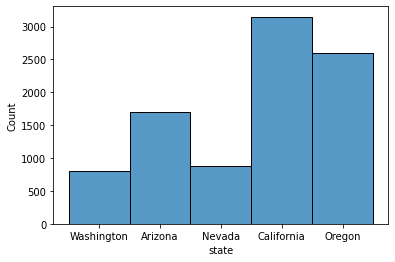

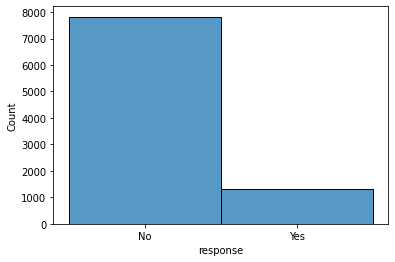

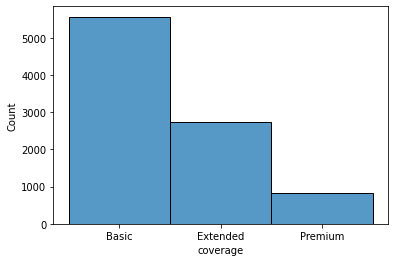

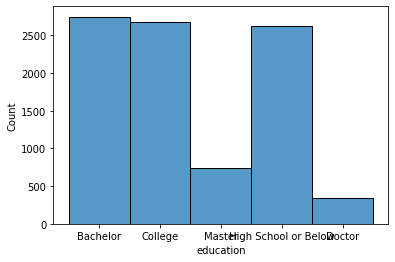

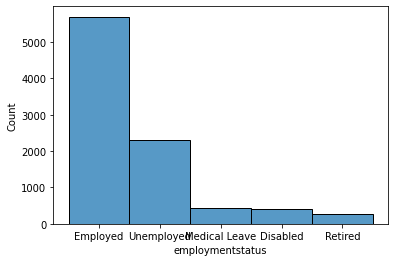

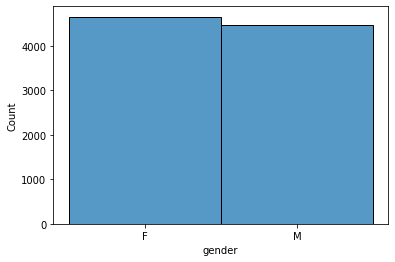

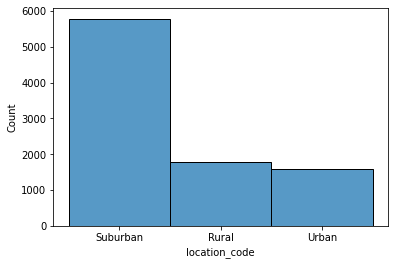

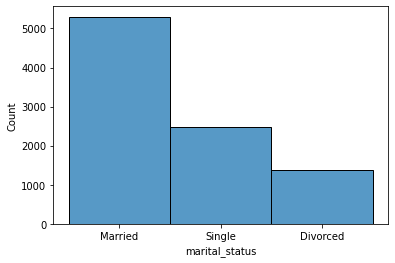

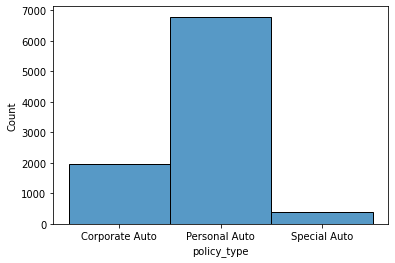

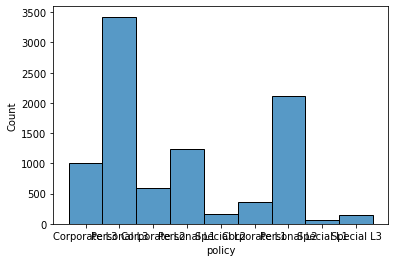

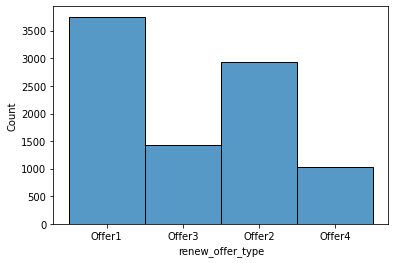

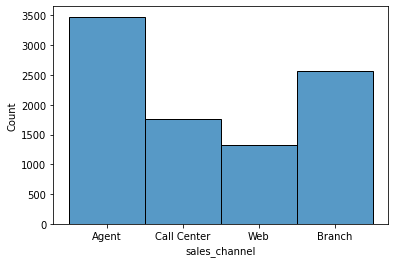

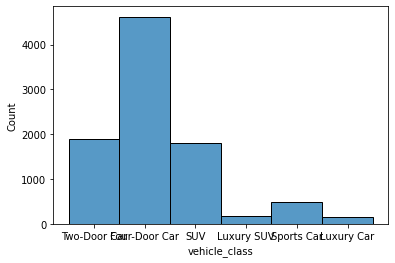

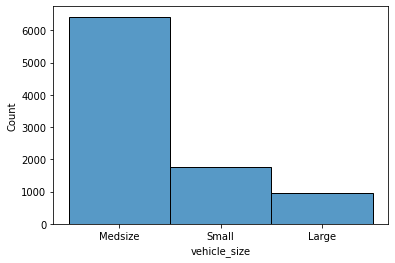

In [19]:
plot_categoricals(cat)

- Customer: useless, we should set it as an index.
- State: 2 tiers, Cal and Ore, Washington Arizona and Nevada
- Responses: "No" outnumbers "Yes" --> I don't know the question though...
- Coverage: distribution makes sense, most premium services only purchased by few customers.
- Education: highest levels are the rarest
- Effective To Date: it is a date, probably it is more useful if we convert it to month and year.


## 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

In [20]:
# drop 'response' column as we don't know what is it answering
customer_df = customer_df.drop('response', 1)

In [21]:
customer_df.head(3)

customer       state  customer_lifetime_value  coverage education  \
0  BU79786  Washington              2763.519279     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903  Extended  Bachelor   
2  AI49188      Nevada             12887.431650   Premium  Bachelor   

  effective_to_date employmentstatus gender  income location_code  ...  \
0        2011-02-24         Employed      F   56274      Suburban  ...   
1        2011-01-31       Unemployed      F       0      Suburban  ...   
2        2011-02-19         Employed      F   48767      Suburban  ...   

  months_since_policy_inception  number_of_open_complaints  \
0                             5                          0   
1                            42                          0   
2                            38                          0   

   number_of_policies     policy_type        policy  renew_offer_type  \
0                   1  Corporate Auto  Corporate L3            Offer1   
1                   8   Personal Auto   Personal L3            Offer3   
2                   2   Personal Auto   Personal L3            Offer1   

  sales_channel total_claim_amount  vehicle_class vehicle_size  
0         Agent         384.811147   Two-Door Car      Medsize  
1         Agent        1131.464935  Four-Door Car      Medsize  
2         Agent         566.472247   Two-Door Car      Medsize  

[3 rows x 23 columns]

## 4. Plot time variable. Can you extract something from it?

As we have seen in previous steps, the visual representation is useless. We can try to change date format to month and year and see if the resulting histogram is interesting.

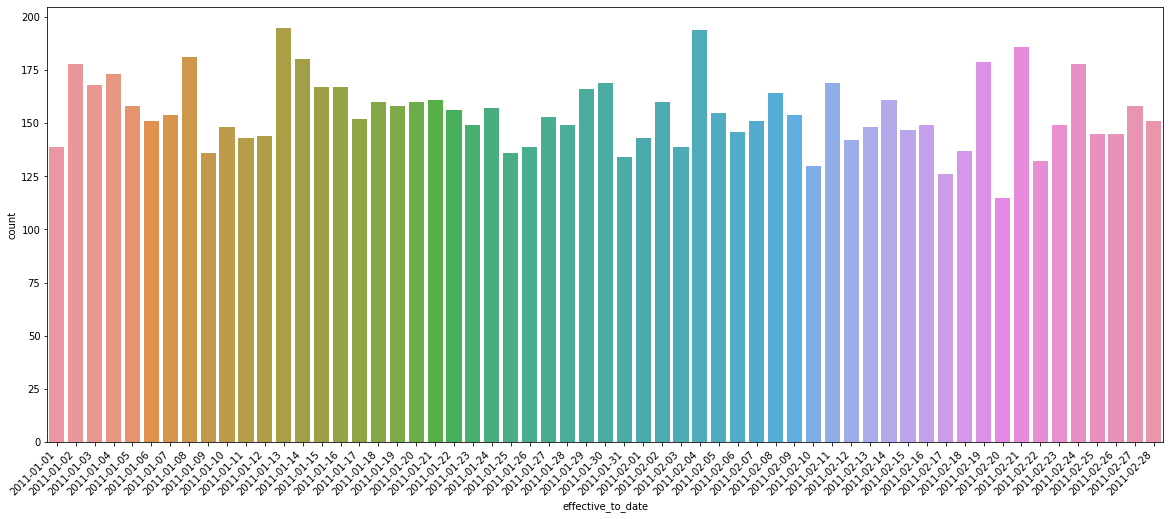

In [22]:
plt.figure(figsize=(20,8))
chart = sns.countplot(
    data=customer_df,
    x='effective_to_date',
)
x_dates = customer_df['effective_to_date'].dt.strftime('%Y-%m-%d').sort_values().unique()
chart.set_xticklabels(labels=x_dates, rotation=45, ha='right')
None

I am not being able to group dates by month and year so I can't plot what I think that would be valueable.

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

### 1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

customer_lifetime_value


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


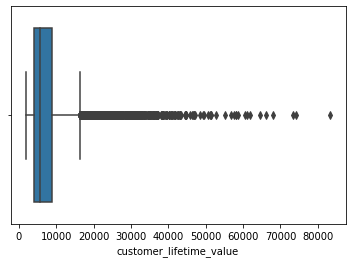

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


income


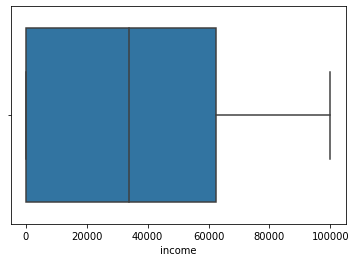

monthly_premium_auto


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


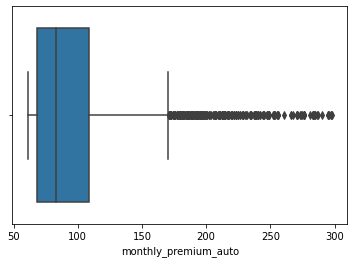

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


months_since_last_claim


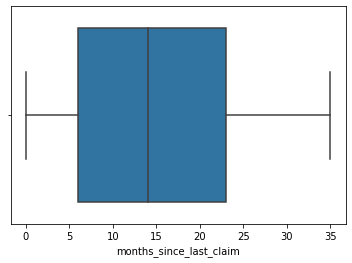

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


months_since_policy_inception


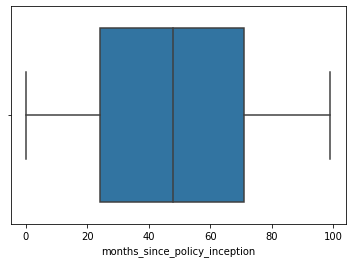

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


number_of_open_complaints


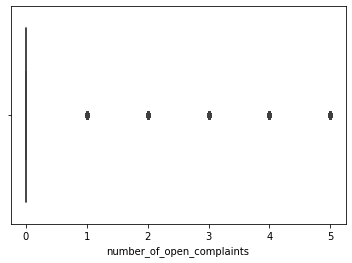

number_of_policies


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


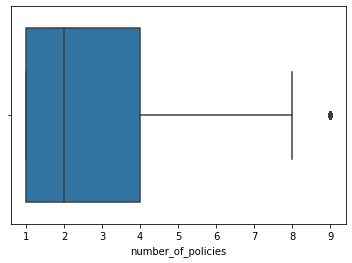

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


total_claim_amount


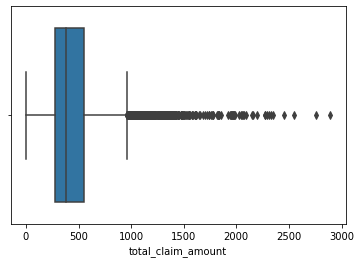

In [23]:
for cols in customer_df.select_dtypes(np.number):
    sns.boxplot(customer_df[cols])
    print(cols)
    plt.show()

In [24]:
customer_df.shape

(9134, 23)

In [25]:
'''
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df
'''

'\ndef remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):\n    for column in in_columns:\n        if column not in skip_columns:\n            upper = np.percentile(df[column],75)\n            lower = np.percentile(df[column],25)\n            iqr = upper - lower\n            upper_limit = upper + (threshold * iqr)\n            lower_limit = lower - (threshold * iqr)\n            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]\n    return df\n'

In [26]:
def remove_outliers(df, threshold=1.5, in_columns=[], skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + (threshold * iqr)
            lower_limit = lower - (threshold * iqr)
            df.loc[df[column] > upper_limit, column] = upper_limit
            df.loc[df[column] < lower_limit, column] = lower_limit
    return df

In [27]:
'''
customer_df = remove_outliers(customer_df, in_columns=customer_df.select_dtypes(np.number).columns)
customer_df
'''

'\ncustomer_df = remove_outliers(customer_df, in_columns=customer_df.select_dtypes(np.number).columns)\ncustomer_df\n'

In [28]:
customer_df = remove_outliers(customer_df, threshold=1.5, in_columns=customer_df.select_dtypes(np.number).columns, skip_columns=['number_of_open_complaints'])


customer_lifetime_value


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


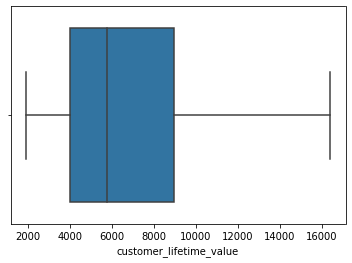

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


income


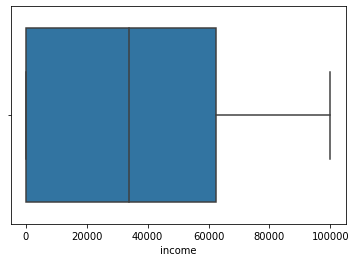

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


monthly_premium_auto


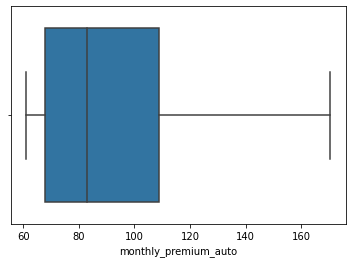

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


months_since_last_claim


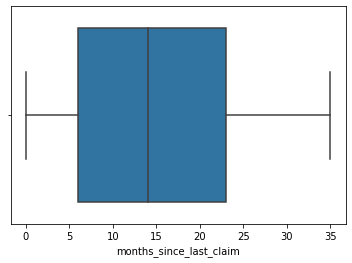

months_since_policy_inception

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


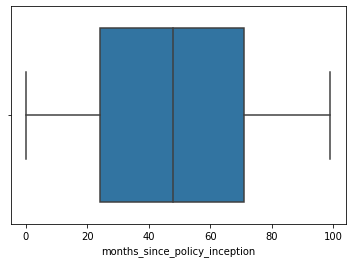

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


number_of_open_complaints


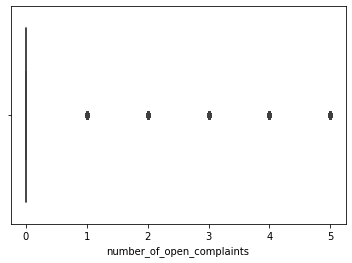

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


number_of_policies


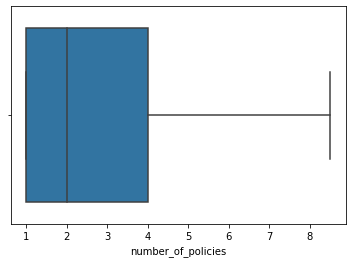

total_claim_amount


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


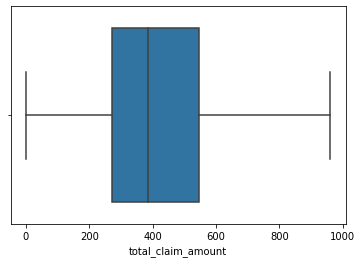

In [29]:
for cols in customer_df.select_dtypes(np.number):
    sns.boxplot(customer_df[cols])
    print(cols)
    plt.show()

### 2. Create a copy of the dataframe for the data wrangling.

In [30]:
df_copy = customer_df.copy()
df_copy.shape

(9134, 23)

### 3. Normalize the continuous variables. You can use any one method you want.

In [31]:
numericals = df_copy.select_dtypes(np.number)
numericals.head(3)

customer_lifetime_value   income  monthly_premium_auto  \
0              2763.519279  56274.0                  69.0   
1              6979.535903      0.0                  94.0   
2             12887.431650  48767.0                 108.0   

   months_since_last_claim  months_since_policy_inception  \
0                     32.0                            5.0   
1                     13.0                           42.0   
2                     18.0                           38.0   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                          0                 1.0          384.811147  
1                          0                 8.0          960.399730  
2                          0                 2.0          566.472247

In [32]:
def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        # since i know any columns should take negative numbers, to avoid -inf in df
        df[column] = np.where(df[column]<=0, np.NAN, df[column]) 
        df[column] = df[column].fillna(df[column].mean())
        transformed_data, ci = stats.boxcox(df[column])
        df[column] = transformed_data
        _ci[column] = [ci] 
    return df, _ci

In [33]:
numericals_scaled, _ci = boxcox_transform(numericals)
numericals_scaled.head(3)

<ipython-input-32-57b7d1f522ac>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.where(df[column]<=0, np.NAN, df[column])
<ipython-input-32-57b7d1f522ac>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(df[column].mean())
<ipython-input-32-57b7d1f522ac>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

customer_lifetime_value       income  monthly_premium_auto  \
0                 5.722930  1247.937066              0.779751   
1                 6.169158  1167.961720              0.780898   
2                 6.445326  1144.063081              0.781283   

   months_since_last_claim  months_since_policy_inception  \
0                10.876059                       3.017887   
1                 5.808248                      18.780377   
2                 7.347815                      17.389171   

   number_of_open_complaints  number_of_policies  total_claim_amount  
0                   0.648045            0.000000           65.068123  
1                   0.648045            1.435811          116.702024  
2                   0.648045            0.609116           83.361312

### 4. Encode the categorical variables

In [34]:
categoricals = df_copy.select_dtypes('object')

In [41]:
categoricals_encoded = pd.get_dummies(categoricals, drop_first=True)

### 5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

In [42]:
date = pd.DataFrame(df_copy['effective_to_date'])
date.head(3)

effective_to_date
0        2011-02-24
1        2011-01-31
2        2011-02-19

In [43]:
date['day'] = date['effective_to_date'].dt.day
date['month'] = date['effective_to_date'].dt.month
date['year'] = date['effective_to_date'].dt.year

In [44]:
date = date.drop(['effective_to_date'], axis=1)

In [45]:
date.head(3)

day  month  year
0   24      2  2011
1   31      1  2011
2   19      2  2011

### 6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [46]:
model_data = pd.concat([categoricals_encoded, numericals_scaled], axis=1)

In [102]:
def check_categoricals(df):
    cat_list = []
    categoricals = df.select_dtypes('object')
    for c in categoricals.columns:
        cat_list.append(c)
    return cat_list

In [103]:
check_categoricals(model_data)

[]

In [104]:
model_data['customer_ZY57929'].dtypes

dtype('uint8')